# Hodgkin-Huxley model

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# parameters
a = .02
b = .2
c = -50
d = 2

v = -65
u = v*b

In [53]:
# initialize variables
simulation_time = 1000
memvolt = np.zeros(simulation_time)
Iall = np.zeros(simulation_time)


# for loop over simulation time
for t in range(simulation_time):

    # define the input strength
    I = 7
    if (t>200) & (t<400):
        I = -2

    # check if there is an action potential
    if v >= 30:
        v = c
        u += d

    # update the membrane variables
    v += .04*v**2 + 5*v + 140 - u + I
    u += a*(b*v-u)

    # collect the variables for subsequent plotting
    memvolt[t] = v
    Iall[t] = I

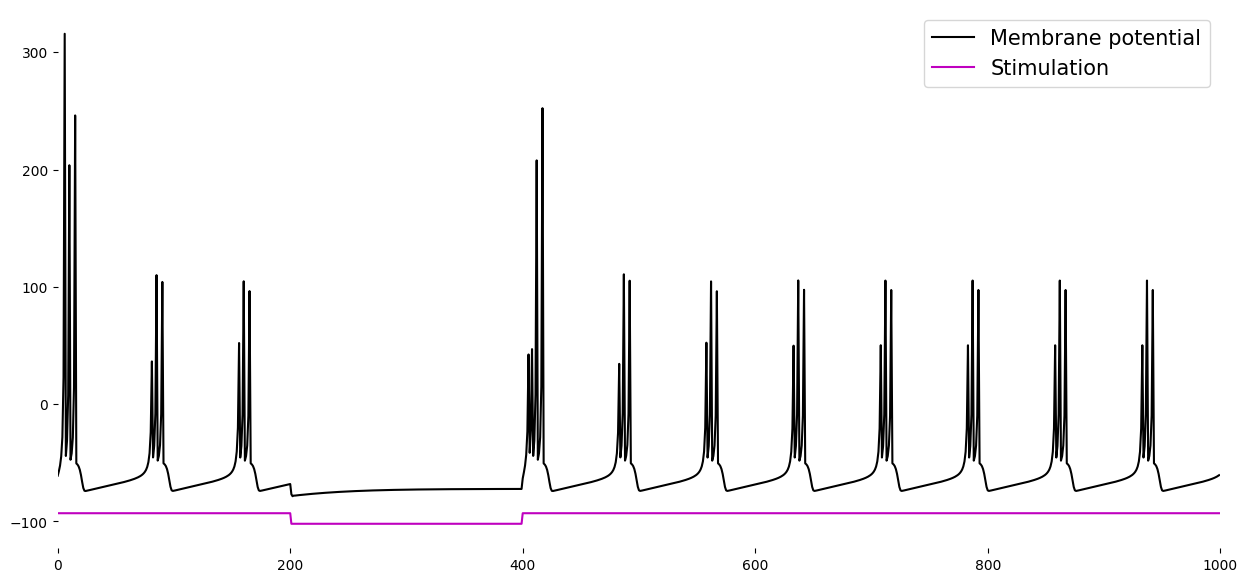

In [54]:
# plotting
fig, ax = plt.subplots(1, figsize=(15,7))
plt.plot(memvolt, "k", label="Membrane potential")
plt.plot(Iall-100, "m", label="Stimulation")
plt.box(False)
plt.xlim([0,simulation_time])
plt.legend(fontsize=15)
plt.show()

In [59]:
# exitatory cells                                       inhibitory cells
Ne = 800;                                               Ni = 200
re = np.random.rand(Ne)**2;                             ri = np.random.rand(Ni)

a = np.hstack((.02*np.ones(Ne),                         .02+.08*ri))
b = np.hstack((.2*np.ones(Ne),                          .25-.05*ri))                       
c = np.hstack((-65+15*re**2,                            -65*np.ones(Ni)))                       
d = np.hstack((8-6*re**2,                                2*np.ones(Ni)))                       

v = -65*np.ones(Ne+Ni)
u = b*v

# S matrix (connectivity)
S = np.hstack((.5*np.random.rand(Ne+Ni, Ne), -np.random.rand(Ne+Ni, Ni)))

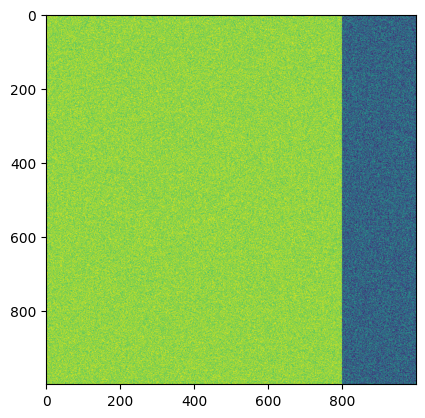

In [60]:
plt.imshow(S)
plt.show()

In [61]:
simulation_time = 5000
firings = np.array([[],[]])

for t in range(simulation_time):

    # define the exogenous input
    I = np.hstack((5*np.random.randn(Ne), 2*np.random.randn(Ni)))

    # check for action potentials
    fired = np.where(v >= 30)[0]

    # store the spike indeices and times
    tmp     = np.stack((np.tile(t,len(fired)),fired))
    firings = np.concatenate((firings,tmp),axis=1)

    # update membrane variables for neurons that spiked
    v[fired] = c[fired]
    u[fired] = u[fired] + d[fired]

    # update the I to include spiking activity
    I += np.sum(S[:,fired], axis=1)

    # update membrane potential for ALL neurons
    v += .04*v**2 + 5*v + 140 - u + I
    u += a*(b*v-u)

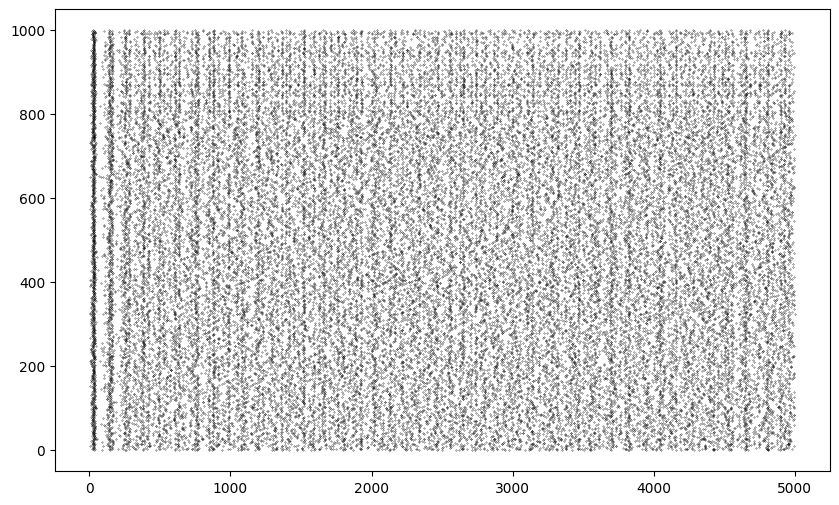

In [65]:
plt.subplots(1, figsize=(10,6))
plt.plot(firings[0,:], firings[1,:], "k.", markersize=.5)
plt.show()

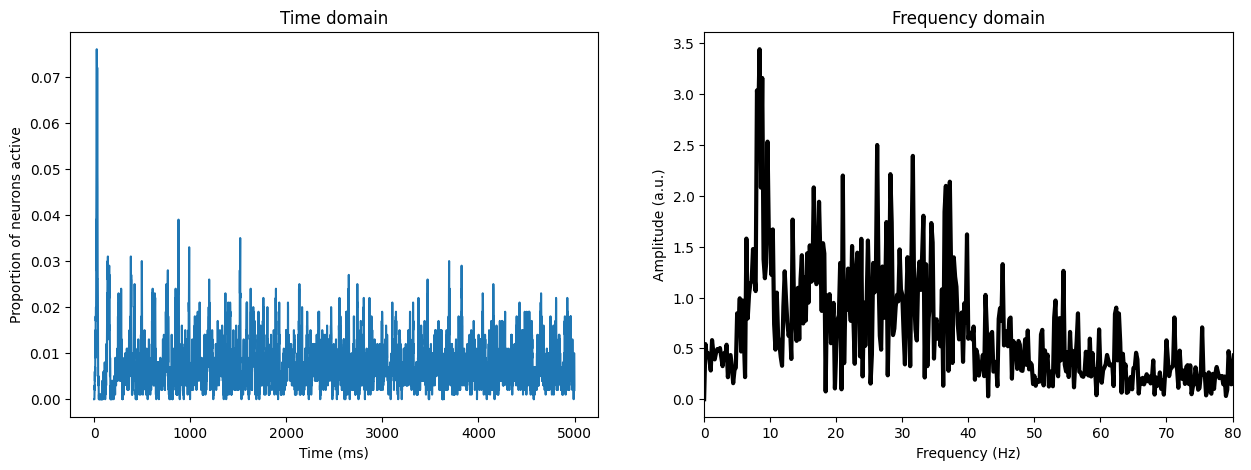

In [66]:
popact = np.zeros(simulation_time)

for t in range(simulation_time):
    popact[t] = np.sum(firings[0,:]==t) / (Ne+Ni)

fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(popact)
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Proportion of neurons active')
ax[0].set_title('Time domain')

popactX = np.abs(np.fft.fft(popact-np.mean(popact)))
hz = np.linspace(0,500,int(simulation_time/2+1))

ax[1].plot(hz,popactX[:len(hz)],'k',linewidth=3)
ax[1].set_xlim([0,80])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude (a.u.)')
ax[1].set_title('Frequency domain')

plt.show()